# Neural Networks Assignment 2

# Use the use case in the class:

a. Add more Dense layers to the existing code and check how the accuracy changes

In [135]:
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import warnings
warnings.filterwarnings("ignore")

In [136]:
# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv("diabetes.csv", header=None).values

In [137]:

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)

In [138]:
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(16, input_dim=8, activation='relu'))
my_first_nn.add(Dense(8, input_dim=8, activation='relu'))

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)

Epoch 1/100
576/576 [==============================] - 1s 2ms/step - loss: 3.3531 - acc: 0.6545
Epoch 2/100
576/576 [==============================] - 0s 25us/step - loss: 3.1454 - acc: 0.6580
Epoch 3/100
576/576 [==============================] - 0s 58us/step - loss: 2.9636 - acc: 0.6285
Epoch 4/100
576/576 [==============================] - 0s 30us/step - loss: 2.2093 - acc: 0.6076
Epoch 5/100
576/576 [==============================] - 0s 36us/step - loss: 1.2166 - acc: 0.6094
Epoch 6/100
576/576 [==============================] - 0s 58us/step - loss: 0.8540 - acc: 0.6458
Epoch 7/100
576/576 [==============================] - 0s 29us/step - loss: 0.7635 - acc: 0.6510
Epoch 8/100
576/576 [==============================] - 0s 58us/step - loss: 0.7414 - acc: 0.6510
Epoch 9/100
576/576 [==============================] - 0s 29us/step - loss: 0.7059 - acc: 0.6615
Epoch 10/100
576/576 [==============================] - 0s 58us/step - loss: 0.6954 - acc: 0.6771
Epoch 11/100
576/576 [========

In [139]:
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_67 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_68 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 9         
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________
None
192/192 [==============================] - 0s 2ms/step
[0.6354507406552633, 0.7135416666666666]


# Change the data source to Breast Cancer dataset * available in the source code folder and make required changes. Report accuracy of the model.

In [140]:
dataset2 = pd.read_csv("breastcancer.csv")
dataset2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [141]:
y=dataset2.iloc[:,1]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [142]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(y)

In [143]:
dataset2.drop(columns=['id','diagnosis', 'Unnamed: 32'],axis =1, inplace = True)

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset2, Y,
                                                    test_size=0.25, random_state=87)

In [146]:
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(30, input_dim=30, activation='relu')) # hidden layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)

Epoch 1/100
426/426 [==============================] - 1s 2ms/step - loss: 6.0704 - acc: 0.5211
Epoch 2/100
426/426 [==============================] - 0s 73us/step - loss: 5.6612 - acc: 0.6103
Epoch 3/100
426/426 [==============================] - 0s 50us/step - loss: 4.6649 - acc: 0.4836
Epoch 4/100
426/426 [==============================] - 0s 65us/step - loss: 3.0270 - acc: 0.6103
Epoch 5/100
426/426 [==============================] - 0s 43us/step - loss: 1.1544 - acc: 0.8052
Epoch 6/100
426/426 [==============================] - 0s 39us/step - loss: 0.6493 - acc: 0.8685
Epoch 7/100
426/426 [==============================] - 0s 40us/step - loss: 0.5026 - acc: 0.8897
Epoch 8/100
426/426 [==============================] - 0s 67us/step - loss: 0.4775 - acc: 0.8991
Epoch 9/100
426/426 [==============================] - 0s 45us/step - loss: 0.4182 - acc: 0.9038
Epoch 10/100
426/426 [==============================] - 0s 39us/step - loss: 0.4654 - acc: 0.9061
Epoch 11/100
426/426 [========

In [147]:
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None
143/143 [==============================] - 0s 3ms/step
[0.3161292451244968, 0.9160839169175474]


# Normalize the data before feeding the data to the model and check how the normalization change your accuracy (code given below).

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [149]:
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(30, input_dim=30, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)

Epoch 1/100
426/426 [==============================] - 1s 2ms/step - loss: 0.4158 - acc: 0.8521
Epoch 2/100
426/426 [==============================] - 0s 30us/step - loss: 0.2847 - acc: 0.9272
Epoch 3/100
426/426 [==============================] - 0s 40us/step - loss: 0.2173 - acc: 0.9531
Epoch 4/100
426/426 [==============================] - 0s 39us/step - loss: 0.1795 - acc: 0.9601
Epoch 5/100
426/426 [==============================] - 0s 78us/step - loss: 0.1556 - acc: 0.9601
Epoch 6/100
426/426 [==============================] - 0s 39us/step - loss: 0.1390 - acc: 0.9624
Epoch 7/100
426/426 [==============================] - 0s 39us/step - loss: 0.1268 - acc: 0.9624
Epoch 8/100
426/426 [==============================] - 0s 44us/step - loss: 0.1171 - acc: 0.9671
Epoch 9/100
426/426 [==============================] - 0s 64us/step - loss: 0.1089 - acc: 0.9695
Epoch 10/100
426/426 [==============================] - 0s 42us/step - loss: 0.1021 - acc: 0.9695
Epoch 11/100
426/426 [========

In [150]:
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None
143/143 [==============================] - 0s 2ms/step
[0.1936580974322099, 0.9650349654517807]


# Use Image Classification on the hand written digits data set (mnist)

In [164]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2747 - acc: 0.9144 - val_loss: 0.1577 - val_acc: 0.9474
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0933 - acc: 0.9714 - val_loss: 0.0875 - val_acc: 0.9726
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0577 - acc: 0.9821 - val_loss: 0.1196 - val_acc: 0.9644
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0411 - acc: 0.9873 - val_loss: 0.0692 - val_acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0304 - acc: 0.9907 - val_loss: 0.0723 - val_acc: 0.9806
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0221 - acc: 0.9928 - val_loss: 0.0743 - val_acc: 0.9805
Epoch 7/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.0181 - acc: 0.9942 - val_loss: 0.

# Plot the loss and accuracy for both training data and validation data using the history object in the source code

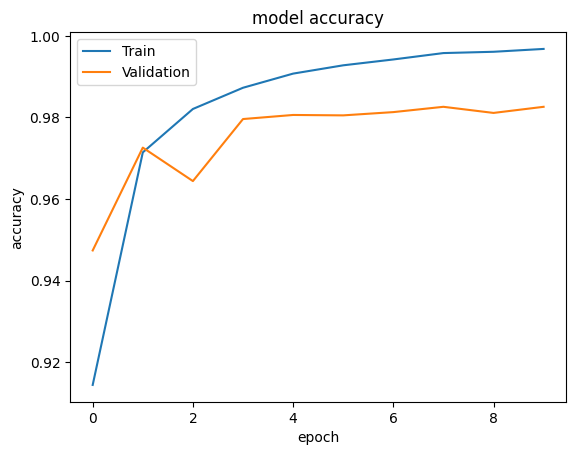

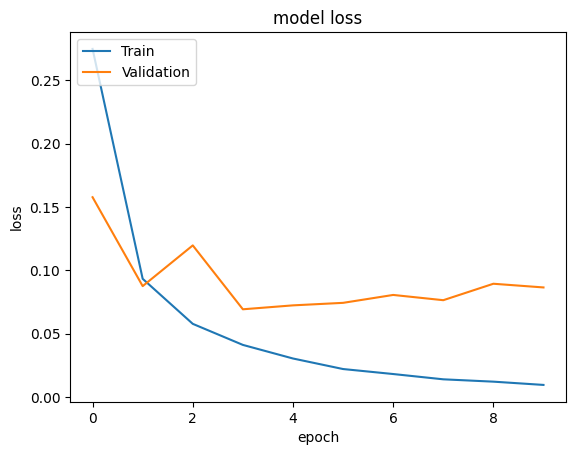

In [165]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image

In [186]:
predictions = model.predict(test_data)

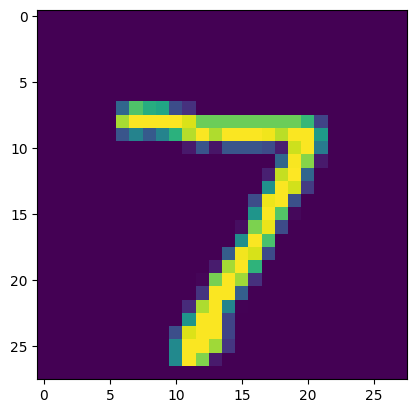

In [187]:
image = np.array(test_images[0]).reshape(28, 28)
plt.imshow(image)

# We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens

In [163]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.3345 - acc: 0.8947 - val_loss: 0.1824 - val_acc: 0.9429
Epoch 2/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.1234 - acc: 0.9616 - val_loss: 0.1162 - val_acc: 0.9630
Epoch 3/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0816 - acc: 0.9747 - val_loss: 0.0900 - val_acc: 0.9712
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0626 - acc: 0.9800 - val_loss: 0.0811 - val_acc: 0.9739
Epoch 5/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0466 - acc: 0.9850 - val_loss: 0.0854 - val_acc: 0.9726
Epoch 6/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0370 - acc: 0.9874 - val_loss: 0.0904 - val_acc: 0.9743
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0293 - acc: 0.9902 - val_lo

# Run the same code without scaling the images and check the performance?

In [189]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 2.3203 - acc: 0.0990 - val_loss: 2.3290 - val_acc: 0.0958
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 2.3172 - acc: 0.1022 - val_loss: 2.3233 - val_acc: 0.1010
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 2.3173 - acc: 0.1013 - val_loss: 2.3281 - val_acc: 0.1028
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 2.3178 - acc: 0.1003 - val_loss: 2.3402 - val_acc: 0.1135
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 2.3174 - acc: 0.1006 - val_loss: 2.3226 - val_acc: 0.1032
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 2.3173 - acc: 0.1019 - val_loss: 2.3671 - val_acc: 0.1032
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 2.3165 - acc: 0.1027 - val_loss: 2.3